# Check GPU connect

In [1]:
print("a version")

a version


In [2]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

2.4.1+cu121
False


# Content

## Clone dataset

In [5]:
!git clone https://github.com/QuanHoangNgoc/lab2-datacontainer data

Cloning into 'data'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 639.99 KiB | 8.42 MiB/s, done.


In [6]:
import os
root = "/content/"
os.listdir(root)

def format_path(path):
    assert path.startswith(root)
    path = path.replace("\\", "/")
    path = path.replace("\\", "/")
    return path


## Installl

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

## Load data

In [8]:
import numpy as np

train_file = os.path.join(root, "data", "public_data/train/train.npz")
train_file = format_path(train_file)
test_file = os.path.join(root, "data", "public_data/test/test.npz")
test_file = format_path(test_file)

def get_data(train_file):
    print(f"file is {train_file}")
    # Loads the training data from the .npz file.
    train_data = np.load(train_file)
    try:
        # Extracts the features from the training data.
        vectors = train_data['X_train'][:-250]
        # Extracts the labels from the training data.
        vector_y = train_data['y_train'][:-250]
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(vectors, vector_y, test_size=0.2, random_state=42)
        return vectors, vector_y, (X_train, X_test, y_train, y_test)
    except Exception as e:
        print(f"Exception is: {e}")
        vectors = train_data['X_test']
        return vectors, None, None

In [9]:
vectors, vector_y, mydata = get_data(train_file)
vectors_test, vector_y_test, _ = get_data(test_file)

file is /content/data/public_data/train/train.npz
file is /content/data/public_data/test/test.npz
Exception is: 'X_train is not a file in the archive'


In [10]:
print(vectors.shape, vector_y.shape)
print(vectors_test.shape)

(550, 100) (550,)
(200, 100)


## Explain data

In [146]:
for i in range(100):
    print(np.min(vectors[:, i]), np.max(vectors[:, i]))

-2.8106283166180837 2.8241670094027294
-2.78519878195651 2.748782415910065
-2.690275631353535 3.536531654873366
-2.911549919320649 2.9452462899351
-2.7475048427252347 2.721912147906493
-6.839600150807803 4.176872176299632
-5.595500524653065 5.173763017823601
-3.327995360156236 3.471549476805477
-4.576356387185721 5.324896422314157
-5.643058874153653 6.365329589853956
-4.959804328588518 5.7543533098903765
-4.576356387185721 5.324896422314157
-2.5476066726620523 3.120976620705856
-5.092933855756296 6.321504604292656
-3.9224002516183423 2.93032028549251
-5.701772489456799 7.501492222273618
-2.7691765652335416 3.401875562209925
-2.653379100182451 2.9566916332265496
-5.595500524653065 5.173763017823601
-5.498127123322848 6.06498264321694
-3.081142823776587 3.9262377064363267
-2.7414170608291726 3.284118201287884
-6.059572348399323 5.427399492923733
-2.83303029014274 2.6688827582232557
-3.408274589327025 3.852731490654721
-5.515533400704654 5.636855831220316
-3.2210163559857135 3.60241502421

### explain variance

In [147]:
from sklearn.decomposition import PCA
import numpy as np

def get_explained_variance(vectors):
    # Assuming data is a list of vectors (a 2D array)
    data = np.array(vectors)

    # Perform PCA
    pca = PCA()
    pca.fit(data)

    # Explained variance by each principal component
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    print("Explained Variance Ratio: ", explained_variance.shape)
    print("Cumulative Variance: ", cumulative_variance.shape)

    import matplotlib.pyplot as plt

    # Plot cumulative variance
    plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
    # plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance vs Number of Principal Components')
    plt.grid(True)
    plt.show()

    # plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance vs Number of Principal Components')
    plt.grid(True)
    plt.show()

Explained Variance Ratio:  (100,)
Cumulative Variance:  (100,)


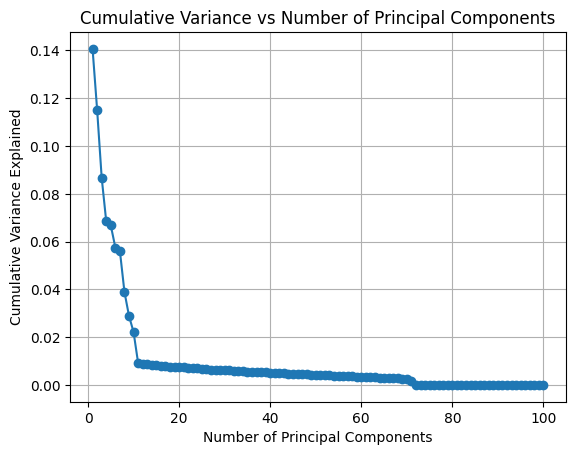

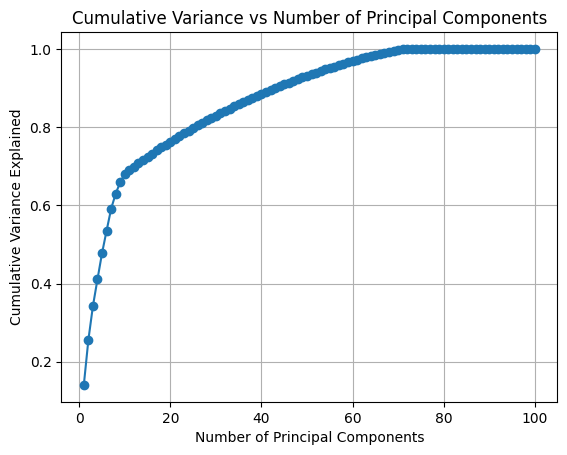

In [148]:
get_explained_variance(vectors)

Explained Variance Ratio:  (100,)
Cumulative Variance:  (100,)


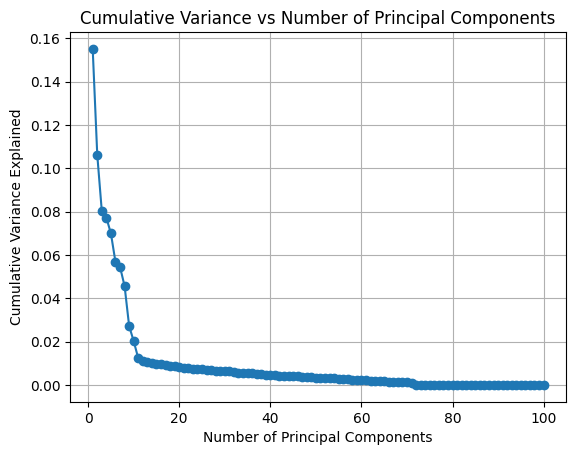

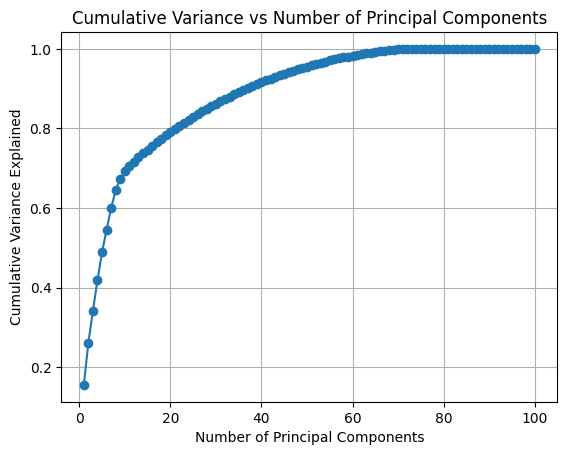

In [149]:
get_explained_variance(vectors_test)

### explain behavior

In [150]:
!pip install umap-learn

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import make_blobs

def get_explain_behavior(vectors, vector_y):
    # Create a sample high-dimensional dataset (for demonstration purposes)
    # You can replace this with your own dataset
    n_samples = 1000
    n_features = 50
    X, y = np.array(vectors), np.array(vector_y)

    # Manifold Learning with t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X)

    # Manifold Learning with UMAP
    umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    X_umap = umap_model.fit_transform(X)

    # Plotting the results for t-SNE and UMAP
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # t-SNE plot
    ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
    ax1.set_title("t-SNE result")
    ax1.set_xlabel("t-SNE Dim 1")
    ax1.set_ylabel("t-SNE Dim 2")

    # UMAP plot
    ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
    ax2.set_title("UMAP result")
    ax2.set_xlabel("UMAP Dim 1")
    ax2.set_ylabel("UMAP Dim 2")

    plt.tight_layout()
    plt.show()

    try:
        from sklearn.metrics import silhouette_score

        tsne_silhouette = silhouette_score(X_tsne, y)
        umap_silhouette = silhouette_score(X_umap, y)

        print(f"t-SNE Silhouette Score: {tsne_silhouette}")
        print(f"UMAP Silhouette Score: {umap_silhouette}")


        from scipy.stats import kurtosis

        tsne_kurtosis = kurtosis(X_tsne, axis=0)
        umap_kurtosis = kurtosis(X_umap, axis=0)

        print(f"t-SNE Kurtosis: {tsne_kurtosis}")
        print(f"UMAP Kurtosis: {umap_kurtosis}")
    except Exception as e:
        print(f"Exception as: {e}")


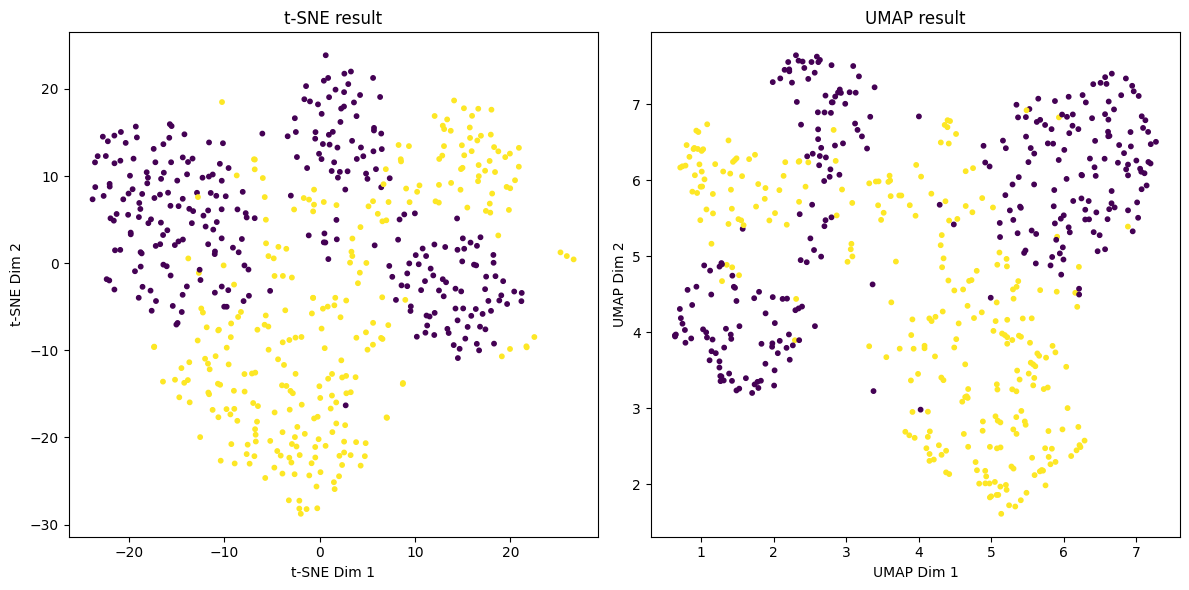

t-SNE Silhouette Score: 0.14241693913936615
UMAP Silhouette Score: 0.1231447234749794
t-SNE Kurtosis: [-0.96852136 -0.7848513 ]
UMAP Kurtosis: [-1.2713393 -0.9625292]


In [152]:
get_explain_behavior(vectors, vector_y)

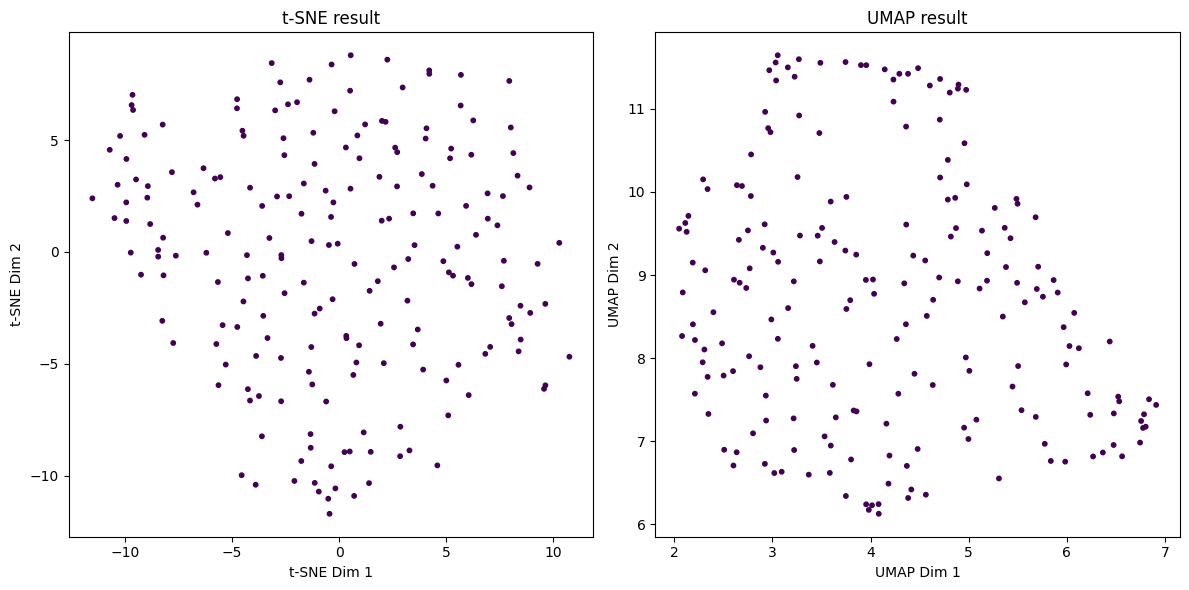

Exception as: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [153]:
import random
get_explain_behavior(vectors_test, [random.randint(0, 0) for i in range(len(vectors_test))])

In [154]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import entropy
import numpy as np


def kmean_entropy_explain(vectors, n_clus):
    # Assuming data is a list of vectors (a 2D array)
    data = np.array(vectors)

    # Fit KMeans with an arbitrary number of clusters
    kmeans = KMeans(n_clusters=n_clus)
    kmeans.fit(data)

    # Get cluster labels and compute inertia (sum of squared distances)
    inertia = kmeans.inertia_
    print(f"KMeans Inertia: {inertia}")

    # Assuming data is a list of vectors (a 2D array)
    data = np.array(vectors)

    # Flatten the data and calculate the probability distribution
    flattened_data = data.flatten()
    value, counts = np.unique(flattened_data, return_counts=True)
    prob_dist = counts / counts.sum()

    # Calculate entropy
    data_entropy = entropy(prob_dist)
    print(f"Shannon Entropy: {data_entropy}")


In [155]:
kmean_entropy_explain(vectors, 10)

KMeans Inertia: 69816.44736729223
Shannon Entropy: 10.585504777614172


In [156]:
kmean_entropy_explain(vectors_test, 10)

KMeans Inertia: 24699.131026158862
Shannon Entropy: 9.573903865935694


## Importance feature

In [157]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def get_IF_RF(vectors, vector_y):
    # Fit the model
    model = RandomForestClassifier()
    model.fit(vectors, vector_y)

    # Get feature importances
    importances = model.feature_importances_

    # Create a DataFrame for visualization
    feature_importances = pd.DataFrame({'Feature': [x for x in range(0, vectors.shape[1])], 'Importance': importances})
    feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

    # Display feature importances
    print(feature_importances)
    return feature_importances

In [158]:
def plot_cumsum(IF, cumulative_variance):
    plt.plot(cumulative_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance vs Number of Principal Components')
    plt.grid(True)
    plt.show()

    print(IF)

    Feature  Importance
86       86    0.051964
30       30    0.050584
19       19    0.041353
15       15    0.036932
84       84    0.034099
..      ...         ...
99       99    0.002475
60       60    0.002434
69       69    0.002222
70       70    0.002168
40       40    0.002036

[100 rows x 2 columns]


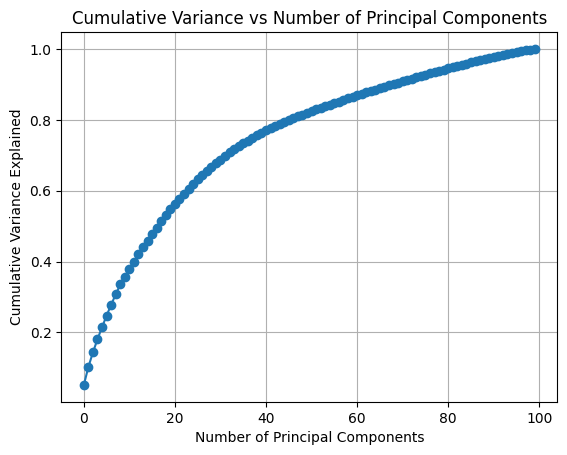

[86, 30, 19, 15, 84, 41, 97, 50, 9, 11, 77, 94, 87, 22, 18, 39, 56, 58, 8, 6, 10, 54, 53, 88, 42, 13, 51, 52, 82, 44, 33, 49, 47, 5, 28, 35, 45, 38, 20, 83, 25, 2, 68, 59, 65, 85, 12, 62, 93, 72, 92, 90, 16, 17, 75, 74, 79, 37, 66, 96, 61, 3, 4, 23, 14, 81, 89, 24, 31, 7, 63, 67, 29, 1, 0, 71, 57, 48, 43, 76, 55, 80, 26, 64, 78, 95, 32, 36, 73, 91, 27, 98, 21, 34, 46, 99, 60, 69, 70, 40]
[86, 30, 19, 15, 84, 41, 97, 50, 9, 11, 77, 94, 87, 22, 18, 39, 56, 58, 8, 6, 10, 54, 53, 88, 42, 13, 51, 52, 82, 44]
[86, 30, 19, 15, 84, 41, 97, 50, 9, 11, 77, 94, 87, 22, 18, 39, 56, 58, 8, 6, 10, 54, 53, 88, 42, 13, 51, 52, 82, 44]


In [215]:
TOP_F = 30
df = get_IF_RF(vectors, vector_y)
IF = df["Feature"].tolist()
cus = np.cumsum(np.array(df["Importance"].tolist()))
plot_cumsum(IF, cus)
print(IF[:TOP_F])
IF_RF = IF[:TOP_F]
print(IF_RF)

In [216]:
from sklearn.feature_selection import SelectKBest, f_classif

def get_IF_BestK(vectors, vector_y, top_k):
    # Select top 5 features based on ANOVA F-statistic
    selector = SelectKBest(score_func=f_classif, k=top_k)
    X_new = selector.fit_transform(vectors, vector_y)

    selected_features = selector.get_feature_names_out(input_features=[x for x in range(vectors.shape[1])])
    print(selected_features)
    return selected_features

In [217]:
IF_BestK = get_IF_BestK(vectors, vector_y, TOP_F)
print(IF_BestK)

[2 5 6 8 9 10 11 15 18 19 22 28 30 33 39 41 45 50 53 54 56 58 77 83 84 86
 87 92 94 97]
[2 5 6 8 9 10 11 15 18 19 22 28 30 33 39 41 45 50 53 54 56 58 77 83 84 86
 87 92 94 97]


In [218]:
from sklearn.linear_model import Lasso

def get_IF_Lasso(vectors, vector_y):
    # Fit Lasso model
    model = Lasso(alpha=0.1)
    model.fit(vectors, vector_y)

    # Get selected features
    important_features = np.where(model.coef_ != 0)[0]
    feature_names = [x for x in range(vectors.shape[1])]
    feature_names_selected = [feature_names[i] for i in important_features]
    print(feature_names_selected)
    return feature_names_selected

In [219]:
IF = get_IF_Lasso(vectors, vector_y)
IF_Lasso = IF
print(IF_Lasso)

[9, 15, 51, 54, 56, 84, 87]
[9, 15, 51, 54, 56, 84, 87]


In [201]:
!pip install shap

In [220]:
import shap
from xgboost import XGBClassifier

def get_IF_XGB(vectors, vector_y, vectors_test):
    # Fit model (can use any model)
    model = XGBClassifier()
    model.fit(vectors, vector_y)

    # Explain predictions using SHAP
    explainer = shap.Explainer(model)
    shap_values = explainer(vectors_test)

    # Plot feature importance
    shap.summary_plot(shap_values, vectors_test)

    # Get feature importance values
    global_shap_values = np.abs(shap_values.values).mean(0)

    # Get indices of features sorted by importance
    feature_indices = np.argsort(global_shap_values)[::-1]
    return feature_indices

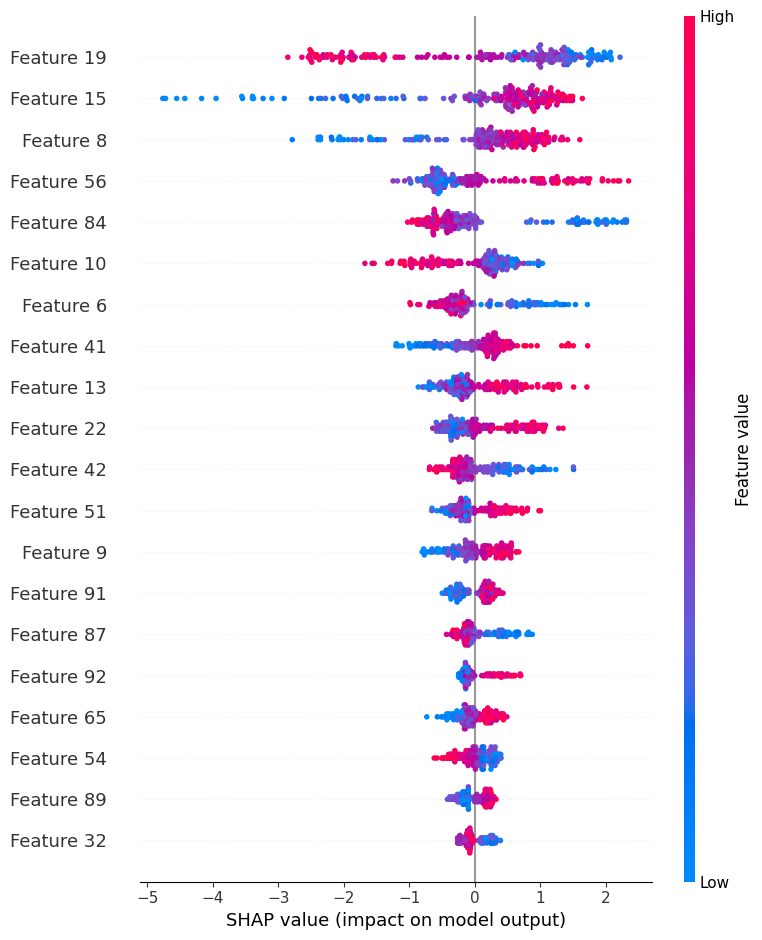

[19 15  8 56 84 10  6 41 13 22 42 51  9 91 87 92 65 54 89 32 96  0  5 12
 44 68 74  2 85 35]


In [221]:
IF = get_IF_XGB(vectors, vector_y, vectors_test)
IF_XGB = IF[:TOP_F]
print(IF_XGB)

### combine

In [222]:
final_IF = set(IF_RF) | set(IF_BestK) | set(IF_Lasso) | set(IF_XGB)
print(final_IF)
print(len(final_IF))
final_IF = list(final_IF)
final_IF.sort()
print(final_IF)

{0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 15, 18, 19, 22, 28, 30, 32, 33, 35, 39, 41, 42, 44, 45, 50, 51, 52, 53, 54, 56, 58, 65, 68, 74, 77, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 96, 97}
48
[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 15, 18, 19, 22, 28, 30, 32, 33, 35, 39, 41, 42, 44, 45, 50, 51, 52, 53, 54, 56, 58, 65, 68, 74, 77, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 96, 97]


Explained Variance Ratio:  (49,)
Cumulative Variance:  (49,)


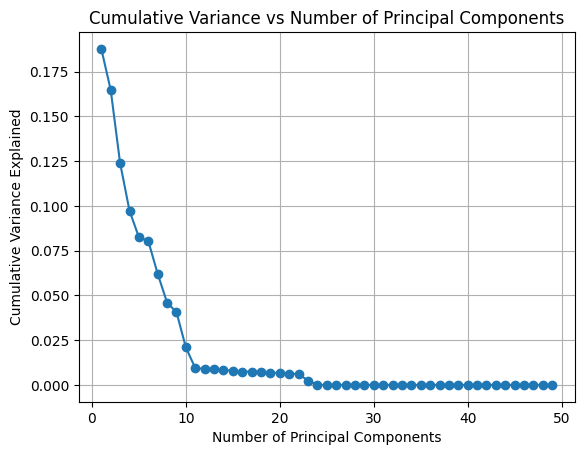

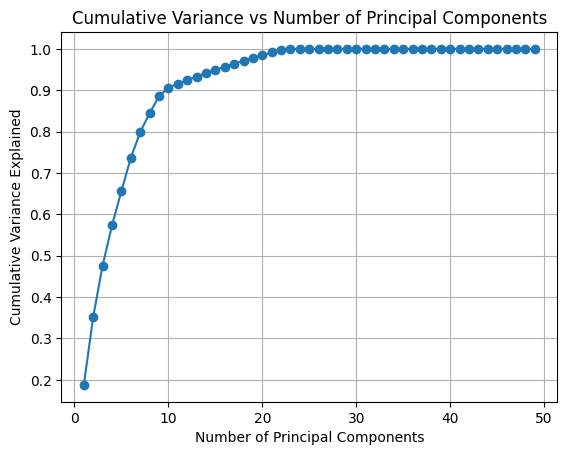

Explained Variance Ratio:  (49,)
Cumulative Variance:  (49,)


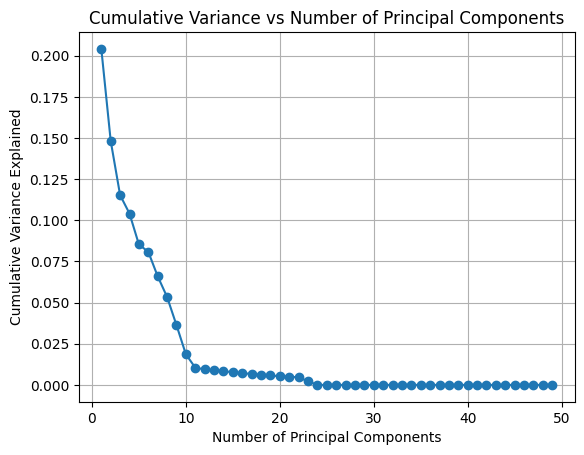

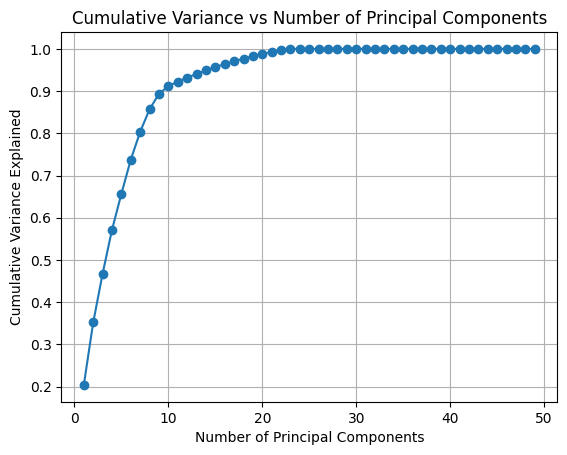

In [205]:
get_explained_variance(vectors[ :, final_IF])
get_explained_variance(vectors_test[ :, final_IF])

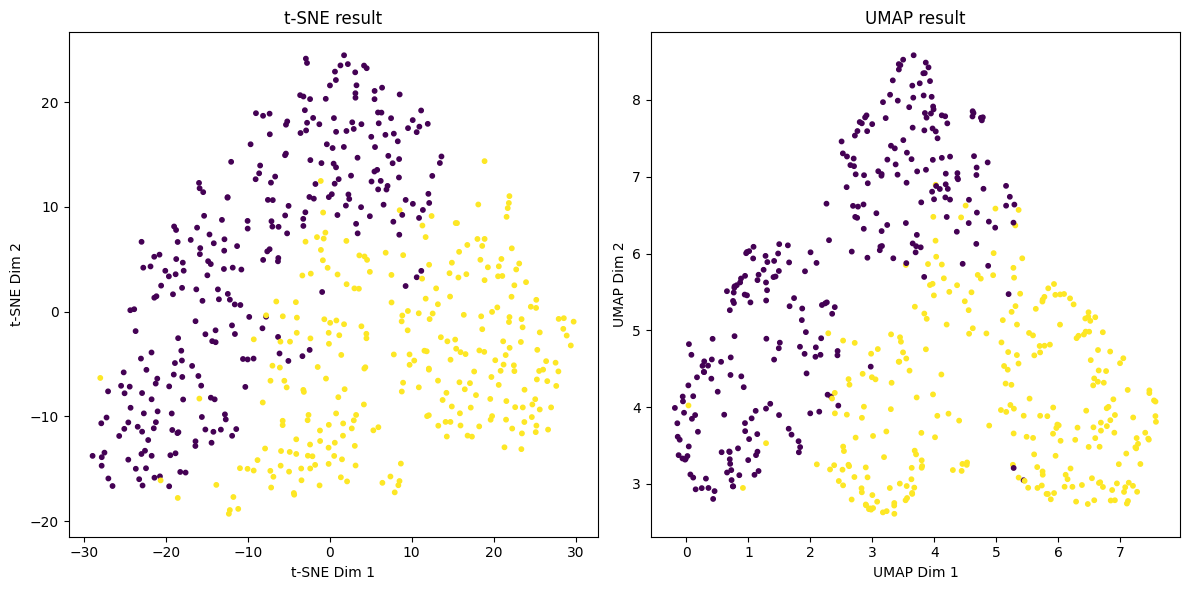

t-SNE Silhouette Score: 0.2954084873199463
UMAP Silhouette Score: 0.33329445123672485
t-SNE Kurtosis: [-0.9223852 -0.8822613]
UMAP Kurtosis: [-0.9189222  -0.85971236]


In [206]:
get_explain_behavior(vectors[ :, final_IF], vector_y)

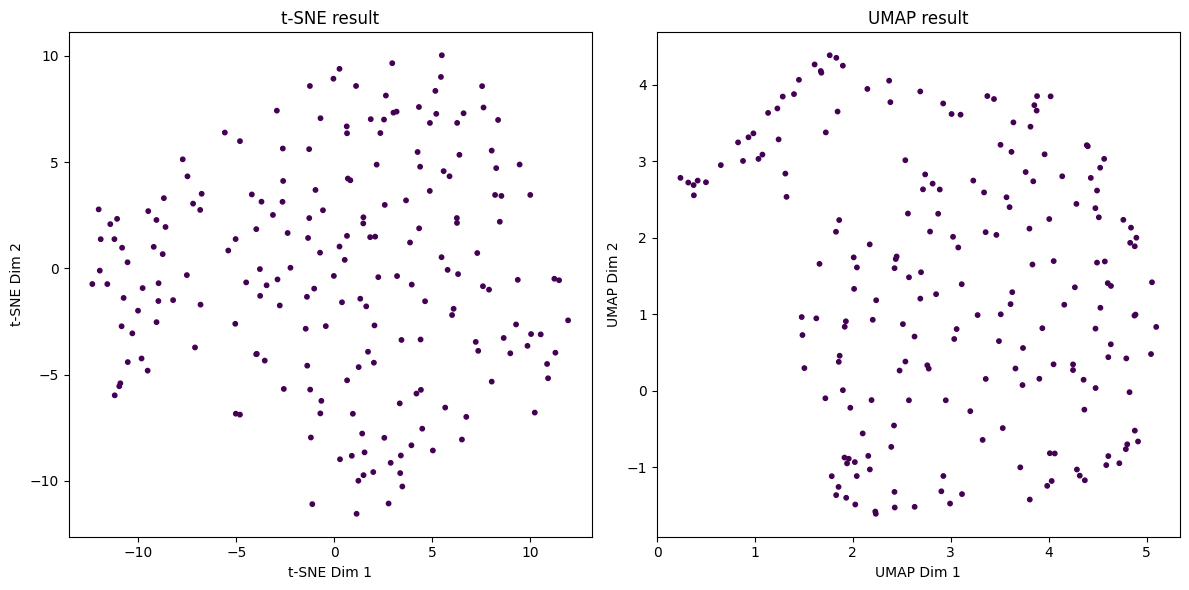

Exception as: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [207]:
import random
get_explain_behavior(vectors_test[:, final_IF], [random.randint(0, 0) for i in range(len(vectors_test))])

In [208]:
kmean_entropy_explain(vectors, 10)
kmean_entropy_explain(vectors_test, 10)
print()
kmean_entropy_explain(vectors[:, final_IF], 10)
kmean_entropy_explain(vectors_test[:, final_IF], 10)

KMeans Inertia: 69909.87057840869
Shannon Entropy: 10.585504777614172
KMeans Inertia: 24983.036752335614
Shannon Entropy: 9.573903865935694

KMeans Inertia: 40421.32149811294
Shannon Entropy: 9.596380784622061
KMeans Inertia: 14736.631670585073
Shannon Entropy: 8.584779872943583


## Pipeline

In [268]:
# Create a dictionary for models and their corresponding parameter grids
models = {
    # 'Logistic Regression': (LogisticRegression(random_state=42, max_iter=200), {
    #     'classifier__C': [0.01, 0.1, 1, 10, 100],
    #     'classifier__solver': ['lbfgs', 'liblinear']
    # }),
    'MLP': (MLPClassifier(activation='relu',             # ReLU activation function
                          solver='adam',                 # Adam optimizer
                          max_iter=500, early_stopping=True,                  # Max iterations for training
                          random_state=42,               # Seed for reproducibility
                          verbose=True), {
        'classifier__alpha': [0.0001, 0.1],
        'classifier__hidden_layer_sizes': [(100, 100), (128, 64), (128, 128), (256, 128, 64)],
        'classifier__learning_rate_init': [0.001, 0.1],  # Added learning rate hyperparameter
        'classifier__batch_size': [32, 128],                # Added batch size hyperparameter
        'classifier__shuffle': [True, False],                  # Added shuffel hyperparameter
    }),
    'KNN': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [1, 3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance']
    }),
    # 'SVM': (SVC(random_state=42), {
    #     'classifier__C': [0.1, 1, 10],
    #     'classifier__kernel': ['linear', 'rbf', 'poly']
    # }),
    # 'Random Forest': (RandomForestClassifier(random_state=42), {
    #     'classifier__n_estimators': [10, 50, 100, 200, 300, 400, 500],
    #     'classifier__max_depth': [None, 10, TOP_F, 30]
    # })
    # 'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
    #     'classifier__max_depth': [3, 5, 7],
    #     'classifier__n_estimators': [100, 200],
    #     'classifier__learning_rate': [0.01, 0.1, 0.3]
    # })
}

In [269]:
from sklearn.decomposition import PCA
from tqdm import tqdm as TQDM
from sklearn.model_selection import GridSearchCV, KFold

CV = 4
KF = KFold(n_splits=CV, shuffle=True, random_state=42)

def Tuning(hypos, vectors, vector_y):
    models = hypos
    X_train, y_train = np.array(vectors), np.array(vector_y)

    # Create a list to store results
    results = []
    # Iterate through each model and perform GridSearchCV
    for model_name, (model, param_grid) in TQDM(models.items()):
        # Define a pipeline with scaling and the classifier
        pipeline = Pipeline([
            ('pca', PCA(random_state=42)),  # Preprocessing step
            ('classifier', model)  # The classifier
        ])

        # Set up param_grid to include PCA parameters
        full_param_grid = {
            'pca__n_components': [(0.9 + x/100) for x in range(1, 10)],  # Adjust the number of components as per your dataset
            **param_grid  # Unpacking the model's parameter grid
        }

        # Set up GridSearchCV
        grid_search = GridSearchCV(estimator=pipeline,
                                param_grid=full_param_grid,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=KF, verbose=1)

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Append results
        results.append({
            'model': model_name,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'best_estimator': grid_search.best_estimator_
        })
    return results

In [270]:
# Display results
def display_tuning(results, vectors_test, vector_y_test):
    X_test = np.array(vectors_test)
    y_test = np.array(vector_y_test)

    for i, result in enumerate(results):
        print(f"Model: {result['model']}")
        print(f"Best Parameters: {result['best_params']}")
        print(f"Best Cross-Validation Score: ***{result['best_score']:.4f}***\n")

        # To evaluate the

        # Overall best model (if desired)
        # best_model = max(results, key=lambda x: x['best_score'])
        best_model = results[i]

        # Test on the test set
        y_pred = best_model['best_estimator'].predict(X_test)
        print(f"Test Set Classification Report for {best_model['model']}:\n", classification_report(y_test, y_pred))

In [271]:
results = Tuning(models, vectors[:, :], vector_y)

  0%|          | 0/2 [00:00<?, ?it/s]

Fitting 4 folds for each of 576 candidates, totalling 2304 fits
Iteration 1, loss = 0.46948605
Validation score: 0.927273
Iteration 2, loss = 0.19821198
Validation score: 0.927273
Iteration 3, loss = 0.11519824
Validation score: 0.945455
Iteration 4, loss = 0.06195897
Validation score: 0.945455
Iteration 5, loss = 0.03532513
Validation score: 0.927273
Iteration 6, loss = 0.01599899
Validation score: 0.909091
Iteration 7, loss = 0.00946438
Validation score: 0.927273
Iteration 8, loss = 0.00546505
Validation score: 0.927273
Iteration 9, loss = 0.00388198
Validation score: 0.927273
Iteration 10, loss = 0.00310424
Validation score: 0.927273


 50%|█████     | 1/2 [10:08<10:08, 608.67s/it]

Iteration 11, loss = 0.00255721
Validation score: 0.927273
Iteration 12, loss = 0.00221759
Validation score: 0.927273
Iteration 13, loss = 0.00193133
Validation score: 0.927273
Iteration 14, loss = 0.00174435
Validation score: 0.927273
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Fitting 4 folds for each of 108 candidates, totalling 432 fits


100%|██████████| 2/2 [10:16<00:00, 308.22s/it]


In [274]:
display_tuning(results, mydata[1][:, :], mydata[3])

Model: MLP
Best Parameters: {'classifier__alpha': 0.0001, 'classifier__batch_size': 32, 'classifier__hidden_layer_sizes': (256, 128, 64), 'classifier__learning_rate_init': 0.001, 'classifier__shuffle': True, 'pca__n_components': 0.96}
Best Cross-Validation Score: ***0.9163***

Test Set Classification Report for MLP:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        52

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

Model: KNN
Best Parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform', 'pca__n_components': 0.9400000000000001}
Best Cross-Validation Score: ***0.9418***

Test Set Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.98    

In [275]:
print(final_IF)
print(TOP_F)

[0, 2, 5, 6, 8, 9, 10, 11, 12, 13, 15, 18, 19, 22, 28, 30, 32, 33, 35, 39, 41, 42, 44, 45, 50, 51, 52, 53, 54, 56, 58, 65, 68, 74, 77, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 96, 97]
30


### Submit

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset for binary classification
X, y = np.array(vectors), np.array(vector_y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP Classifier
mlp = MLPClassifier(
    shuffle=True,
    learning_rate_init=0.001,
    batch_size=32,
    alpha=0.0001,
    hidden_layer_sizes=(256, 128, 64),  # Two hidden layers with 100 neurons each
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    max_iter=500, early_stopping=True,                  # Max iterations for training
    random_state=42,               # Seed for reproducibility
    verbose=True)


# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

Iteration 1, loss = 0.51086991
Validation score: 0.818182
Iteration 2, loss = 0.22584674
Validation score: 0.931818
Iteration 3, loss = 0.13287874
Validation score: 0.909091
Iteration 4, loss = 0.06689863
Validation score: 0.954545
Iteration 5, loss = 0.03811309
Validation score: 0.931818
Iteration 6, loss = 0.01979531
Validation score: 0.931818
Iteration 7, loss = 0.01072125
Validation score: 0.954545
Iteration 8, loss = 0.00656479
Validation score: 0.954545
Iteration 9, loss = 0.00464378
Validation score: 0.954545
Iteration 10, loss = 0.00356642
Validation score: 0.954545
Iteration 11, loss = 0.00291857
Validation score: 0.954545
Iteration 12, loss = 0.00247148
Validation score: 0.954545
Iteration 13, loss = 0.00216613
Validation score: 0.954545
Iteration 14, loss = 0.00193558
Validation score: 0.954545
Iteration 15, loss = 0.00175759
Validation score: 0.954545
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.89
              pr